In [2]:
%matplotlib inline

import os
from pylab import imread
import matplotlib as mpl
import matplotlib.pyplot as plt

# Day 4 Homework: Review and Image Analysis

## Problems 1-3: Review Questions

### #1: Parse image path

Write a function to parse image path (a string), and return the year (int), title (str), and number (int) that are contained in the name.


In [20]:
ls ../Data/Picasso/

1895-First_Communion.-11.jpg                                  1907-The_Dance_of_the_Veils.-5.jpg
1895-The_Barefoot_Girl.-10.jpg                                1908-Decanter_and_Tureens.-23.jpg
1896-Portrait_of_the_Artist's_Mother.-35.jpg                  1908-Dryad.-29.jpg
1896-Self-Portrait.-22.jpg                                    1908-Flowers_in_a_Grey_Jug_and__Wine-Glass_with_Spoon.-1.jpg
1897-Matador_Luis_Miguel_Dominguin.-13.jpg                    1908-Friendship.-16.jpg
1897-Science_and_Charity.-24.jpg                              1908-Green_Bowl_and_Black_Bottle.-26.jpg
1899-Lola,_Picasso's_Sister.-9.jpg                            1908-House_in_a_Garden.-12.jpg
1900-A_Spanish_Couple_in_front_of_an_Inn.-34.jpg              1908-La_Fermière_(full-length).-17.jpg
1901-Death_of_Casagemas.-27.jpg                               1908-La_Fermière_(half-length).-2.jpg
1901-L'Absinthe.-19.jpg                                       1908-Pot,_Wine-Glass_and_Book.-24.jpg
1901-Le_Gourmet.-1

In [22]:
def parse_image_path(image_path):
    # your code
    
    # </ANSWER>
    basename = os.path.basename(image_path)
    basename = basename.split('.jpg')[0]
    parts = basename.split('-')
    year = parts[0]
    num = parts[-1]
    title = basename.split(year + '-')[-1].split('-' + num)[0]
    year = int(year)
    num = int(num)
    # </ANSWER>
    
    return year, title, num

image_path = os.path.join('..', 'Data', 'Picasso', '1905-Juggler_with_Still-Life.-9.jpg')
print(image_path)
print(parse_image_path(image_path))

../Data/Picasso/1905-Juggler_with_Still-Life.-9.jpg
(1905, 'Juggler_with_Still-Life.', 9)


### #2: Create a dictionary containing each path by year

Write a function that looks in a directory finds the names of all the jpg images inside it, parses the name of the images, and counts how many paintings were painted each year.

Store the counts inside a dictionary.

**Hints:**

- glob would be good to organize the files
- copy code from Q1 to pull out the year from the name
- the dictionary should have the years as keys and the image-count as values.

In [10]:
import glob

In [11]:
def image_year(image_directory):
    # your code
    # <ANSWER>
    year_dict = {}
    images = glob.glob(os.path.join(image_directory, '*.jpg'))
    for i in images:
        basename = os.path.basename(i)
        basename = basename.split('.jpg')[0]

        parts = basename.split('-')
        year = int(parts[0])
        year_count = year_dict.get(year, 0)
        year_dict[year] = year_count + 1
    # </ANSWER>
    
    return year_dict

image_directory = os.path.join('..', 'Data', 'Picasso')
print(image_year(image_directory))

../Data/Picasso
{1920: 2, 1921: 4, 1922: 3, 1895: 2, 1896: 2, 1897: 2, 1899: 1, 1900: 1, 1901: 11, 1902: 1, 1903: 8, 1904: 2, 1905: 12, 1906: 9, 1907: 7, 1908: 13, 1909: 9, 1910: 3, 1911: 1, 1912: 6, 1913: 4, 1914: 2, 1915: 1, 1917: 1, 1918: 2, 1919: 3}


### #3: Count which words are used most frequently in Picasso titles

Write a function that looks in a directory finds the names of all the jpg images inside it, parses the name of the images, and counts how many paintings were painted each year.

Store the counts inside a dictionary.

**Hints:**

- in order to properly count words you are going to have to remove punctuation:

`), (,   .,  and "`
- you will also have to either capitialize or lowercase everything to avoid case duplications.

In [14]:
def image_word_frequency(image_directory):
    # your code
    ...
    # <ANSWER>
    word_dict = {}
    images = glob.glob(os.path.join(image_directory, '*.jpg'))
    for i in images:
        # pull out title
        basename = os.path.basename(i)
        basename = basename.split('.jpg')[0]
        parts = basename.split('-')
        year = parts[0]
        num = parts[-1]
        title = basename.split(year + '-')[-1].split('-' + num)[0]
        
        # clean up title
        title = title.replace('_', ' ')
        title = title.replace('"', ' ')
        title = title.replace('(', ' ')
        title = title.replace(')', ' ')
        title = title.replace('.', ' ')

        #store word counts for each.
        for word in title.split():
            word = word.lower()
            word_count = word_dict.get(word, 0)
            word_dict[word] = word_count + 1
    # </ANSWER>
    return word_dict
    
image_directory = os.path.join('..', 'Data', 'Picasso')
print(image_word_frequency(image_directory))

{'pear': 1, 'violin': 3, 'matador': 1, 'fernarde': 1, 'garden': 1, 'crossed': 1, 'ham': 1, 'portrait': 10, 'skull': 1, 'drinker': 2, 'spanish': 1, 'reading': 1, 'harlequin': 5, 'chemise': 1, 'fruit,': 1, 'apples': 1, 'red': 1, 'tavern': 1, 'still': 2, 'horta': 1, 'pitcher': 1, 'cigarette': 1, 'fruit': 3, 'juan-les-pins': 1, 'art': 1, 'visit': 1, 'lola,': 1, 'running': 1, 'olga': 1, 'breakfast': 1, "d'avignon": 2, 'leaning': 1, 'son': 1, 'mandolin': 1, 'masks': 1, 'black': 1, 'tragedy': 1, 'sliced': 1, 'science': 1, 'period': 1, 'catalan': 1, 'youth': 1, 'child': 1, 'glassware': 1, 'dog': 1, 'caning': 1, 'sketch': 1, 'les': 1, "l'ascete": 1, 'toilette': 1, 'tureens': 1, 'book': 1, 'demoiselles': 2, 'seated': 1, 'couch': 1, 'stein': 1, 'letter': 1, 'first': 1, 'acrobat': 2, 'manach': 1, 'instruments': 1, 'sitting': 1, 'still-life': 5, 'young': 4, 'tumblers': 1, 'friendship': 1, "artist's": 1, 'women': 2, 'restaurant': 1, 'head': 2, 'wine-glass': 2, 'communion': 1, 'saltimbanques': 1, 'mi

## Problems 4-7: Image Analyis and Numpy Arrays

### #4: Split colors
Write a function that accepts a color image (as a 3d numpy array) and splits it into three 2D arrays for the red, green, and blue components

../Data/Picasso/1920-Portrait_of_Igor_Stravinsky.-7.jpg
origional shape (597, 463, 3)
red shape (597, 463)
green shape (597, 463)
blue shape (597, 463)


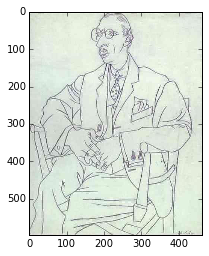

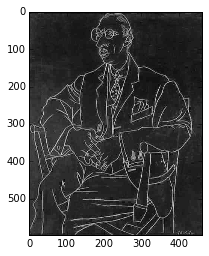

In [26]:
def split_color_image(color_image_array):
    # your code
    
    # <ANSWER> 
    red_slice = color_image_array[:,:,0]
    green_slice = color_image_array[:,:,1]
    blue_slice = color_image_array[:,:,2]
    
    # </ANSWER>
    return red_slice, green_slice, blue_slice
    
    
image_path = os.path.join('..', 'Data', 'Picasso', '1920-Portrait_of_Igor_Stravinsky.-7.jpg')

print(image_path)
color_image_array = imread(image_path)
red_slice, green_slice, blue_slice = split_color_image(color_image_array)

print('origional shape', color_image_array.shape)
print('red shape', red_slice.shape)
print('green shape',green_slice.shape)
print('blue shape',blue_slice.shape)

plt.imshow(color_image_array)
plt.show()
plt.imshow(red_slice, cmap='Greys')
plt.show()

### #5: Average Brightness
Write a function that accepts a color image (3d numpy array) and creates a black and white image (2d numpy array) where each pixel the mean of the R, G, and B values at that X,Y position.

origional shape (730, 560, 3)
red shape (730, 560)


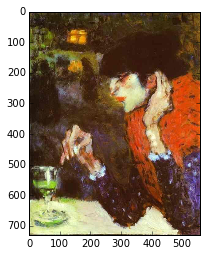

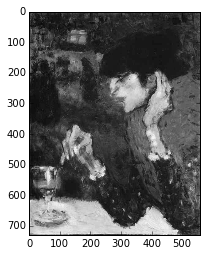

In [36]:
def average_brightness(color_image_array):
    # your code
    
    # <ANSWER>
    avg = color_image_array.mean(axis=2)

    # </ANSWER>
    return avg

image_path = os.path.join('..', 'Data', 'Picasso', '1901-The_Absinthe_Drinker.-26.jpg')

color_image_array = imread(image_path)
new_image = average_brightness(color_image_array)

print('origional shape', color_image_array.shape)
print('red shape', new_image.shape)

plt.imshow(color_image_array, cmap='Greys')
plt.show()
plt.imshow(new_image, cmap='gray')
plt.show()

### #6: Color switch

Write a function that accepts a color image and creates a new image that has all red and green values switched.

**Hint:**
- you can't just reverse the order like the class excercise

origional shape (703, 551, 3)
red shape (703, 551, 3)


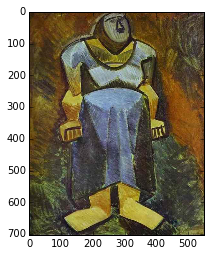

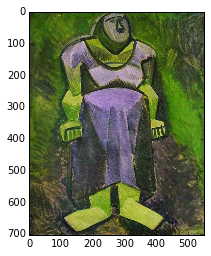

In [18]:
def switch_red_and_blue(color_image_array):
    # your code
    
    # <ANSWER>
    recolored_image = color_image_array[:,:,[1,0,2]]
    
    # </ANSWER>
    return recolored_image

image_path = os.path.join('..', 'Data', 'Picasso', '1908-La_Fermière_(full-length).-17.jpg')

color_image_array = imread(image_path)
new_image = switch_red_and_blue(color_image_array)


print('origional shape', color_image_array.shape)
print('red shape', new_image.shape)

plt.imshow(color_image_array)
plt.show()
plt.imshow(new_image)
plt.show()

### #7: Fraction of Image

Write a function that accepts a color image and returns the fraction of the image that contains blue values larger than a given threshold. 

**Hint:**
- a boolean mask seems appropriate for this task

0.599709993975227


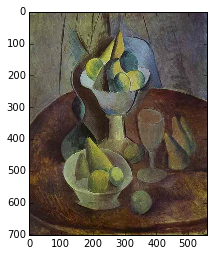

In [27]:
def blue_fraction_of_image(color_image_array, threshold=100):
    # your code
    ...
    # <ANSWER>
    blue_image = color_image_array[:,:,2]
    base = blue_image >= 0
    mask = blue_image > threshold
    blue_fraction = float(mask.sum()) / float(base.sum())
    
    # </ANSWER>
    return blue_fraction 
    
    
image_path = os.path.join('..', 'Data', 'Picasso', '1909-Compotier,_Fruit,_and_Glass.-24.jpg')

color_image_array = imread(image_path)
threshold = 50
print(blue_fraction_of_image(color_image_array, threshold))

plt.imshow(color_image_array)
plt.show()